In [71]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [73]:
import pandas as pd
df=pd.read_csv('Airline_Data_Updated.csv')

In [74]:
df.head()


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [75]:
print(df.isnull().sum())


Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Date                    0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


In [76]:

# 2. Preprocessing
df['Date'] = pd.to_datetime(df['Date'])#convert into date time
df['Month'] = df['Date'].dt.month #extract month

In [77]:
# Encoding categorical features
le_gender = LabelEncoder()
df['Gender_enc'] = le_gender.fit_transform(df['Gender'])

le_continent = LabelEncoder()
df['Continent_enc'] = le_continent.fit_transform(df['Airport Continent'])

le_status = LabelEncoder()
df['Status_enc'] = le_status.fit_transform(df['Flight Status'])

le_nationality = LabelEncoder()
df['Nationality_enc'] = le_nationality.fit_transform(df['Nationality'])

In [78]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Date,Arrival Airport,Pilot Name,Flight Status,Month,Gender_enc,Continent_enc,Status_enc,Nationality_enc
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,6,0,3,2,105
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,12,1,3,2,152
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,1,1,2,2,177
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,9,0,3,1,43
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,2,1,3,2,43


# EDA


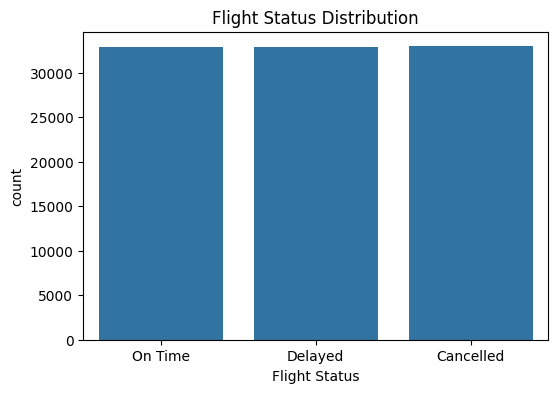

In [79]:
# Flight Status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Flight Status', data=df)
plt.title('Flight Status Distribution')
plt.show()

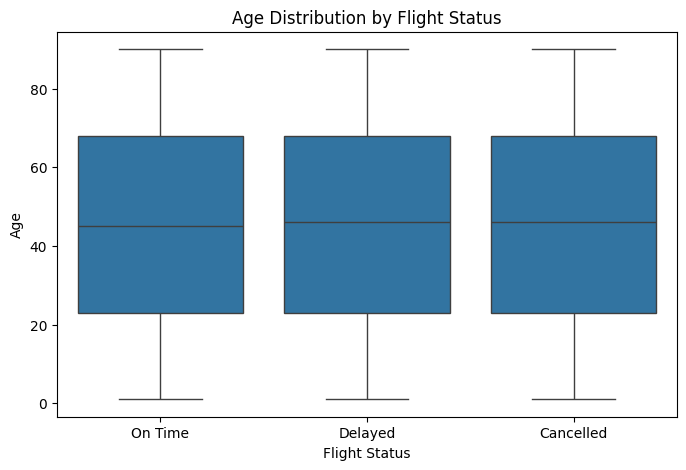

In [80]:
# Age distribution by Flight Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Flight Status', y='Age', data=df)
plt.title('Age Distribution by Flight Status')
plt.show()

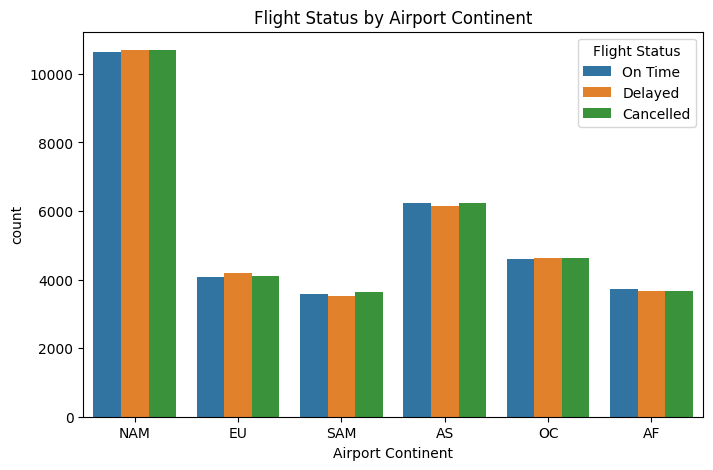

In [81]:
# Flight Status by Continent
plt.figure(figsize=(8,5))
sns.countplot(x='Airport Continent', hue='Flight Status', data=df)
plt.title('Flight Status by Airport Continent')
plt.show()


### prepare feature

In [105]:
# 4. Prepare features and target
features = ['Age', 'Gender_enc', 'Continent_enc', 'Month', 'Nationality_enc']
X = df[features]
y = df['Status_enc']

In [106]:
# 5. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [107]:
# Evaluate with cross-validation
scores = cross_val_score(clf, X, y, cv=3)
print(f"Cross-validation accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-validation accuracies: [0.33529036 0.33392146 0.33705473]
Mean CV accuracy: 0.34


In [108]:
# Fit on full data and show feature importances
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [109]:

importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)


Feature Importances:
Age                0.417626
Nationality_enc    0.361109
Month              0.127080
Continent_enc      0.074843
Gender_enc         0.019342
dtype: float64


In [93]:

# 6. Classification report (on training data because of small size)
y_pred = clf.predict(X)
print("\nClassification Report on full data:")
print(classification_report(y, y_pred, target_names=le_status.classes_))


Classification Report on full data:
              precision    recall  f1-score   support

   Cancelled       0.89      0.89      0.89     32942
     Delayed       0.89      0.89      0.89     32831
     On Time       0.89      0.89      0.89     32846

    accuracy                           0.89     98619
   macro avg       0.89      0.89      0.89     98619
weighted avg       0.89      0.89      0.89     98619

